![datacamp-social-network-analysis-cover](datacamp-social-network-analysis-cover.jpg)

Jump into the buzzing world of Twitter! 🐦 In this project, you'll explore the fascinating network of Twitter connections and uncover the hidden patterns within one of the most popular social networks out there. You'll get hands-on with real Twitter follower data using Pandas, transforming it into a cool directed graph with NetworkX. Along the way, you'll learn how to spot key influencers, find out who follows who, and discover mutual connections between users.

### The Data

# twitter-followers.csv

| Column     | Description              |
|------------|--------------------------|
| `'FOLLOWER'` | id of the user who is following |
| `'FOLLOWEE'` | id of the user being followed |

Throughout the project, you will manipulate and organize this data to extract meaningful insights.

In [8]:
dt = pd.read_csv('twitter-followers.csv')
dt.shape

(834797, 2)

Head of the DataFrame:
   FOLLOWER  FOLLOWEE
0         1         2
1         1         3
2         1         4
3         1         5
4         1         6


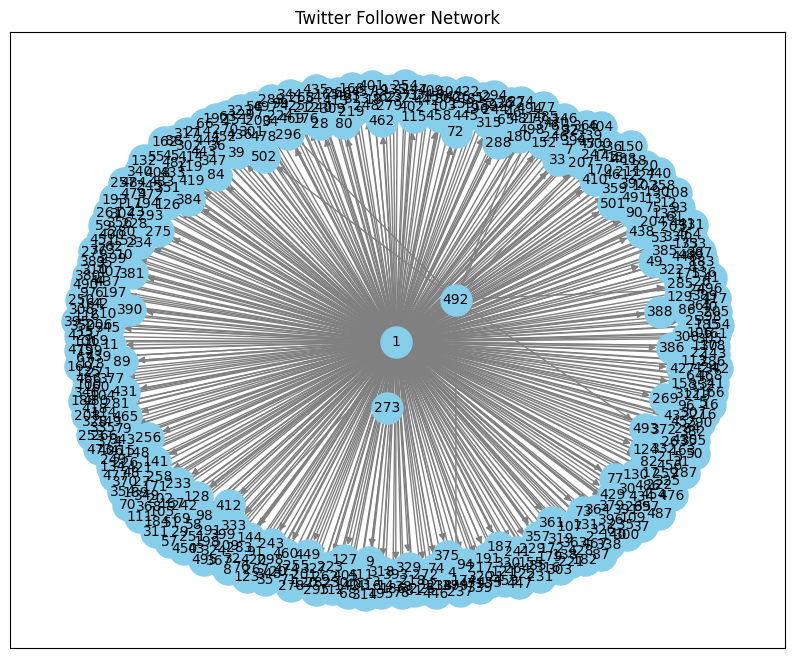


Example of function usage:


NetworkXError: The node userB is not in the digraph.

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load csv data and store as edgelist (a directed graph)
df = pd.read_csv('twitter-followers.csv', nrows=500)
T = nx.from_pandas_edgelist(df, 'FOLLOWER', 'FOLLOWEE', create_using=nx.DiGraph())

# Display head of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Visualize the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(T)  # Positions for all nodes
nx.draw_networkx(T, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.title('Twitter Follower Network')
plt.show()

# Additional functionalities (as previously defined)

# Returns True if user_id2 is following user_id1
def is_following(T, user_id1, user_id2):
    return user_id1 in T.neighbors(user_id2)

# Returns a list of user ids that are following at least min_following_count other users
def get_users_following_min_accounts(T, min_following_count):
    return [node for node in T.nodes() if len(list(T.neighbors(node))) >= min_following_count]

# Returns a list of user ids that user_id1 and user_id2 both follow
def get_mutual_followees(T, user_id1, user_id2):
    followees_user1 = list(T.neighbors(user_id1))
    followees_user2 = list(T.neighbors(user_id2))
    mutual_followees = [user for user in followees_user1 if user in followees_user2]
    return mutual_followees

# Returns the user id of the most connected user (the one with the most followers/followees)
def get_most_connected_user(T):
    degree_centrality = nx.degree_centrality(T)
    most_connected_user = max(degree_centrality, key=degree_centrality.get)
    return most_connected_user

# Example usage:
# Visualize the network graph (already included above)

# Example usage of functions:
print("\nExample of function usage:")
user1 = 'userA'
user2 = 'userB'
print(f"Is {user2} following {user1}? {is_following(T, user1, user2)}")
print(f"Users following at least 5 other users: {get_users_following_min_accounts(T, 5)}")
print(f"Mutual followees of {user1} and {user2}: {get_mutual_followees(T, user1, user2)}")
print(f"Most connected user: {get_most_connected_user(T)}")


(500, 2)